# Suche nach Higgs-Teilchen

## Defintion von Hilfsfunktionen

Zunächst müssen einige Pakete eingelesen werden, die wir später brauchen werden. Mit Hilfe dieser Pakete können wir z.B. die Daten auslesen und Graphen erstellen.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

Dann werden einige Funktionen und Variablen definiert, die wir später benutzen werden. Die Details sind hier nicht so wichtig, Ihr könnt einfach den Code-Block ausführen.

In [3]:
def ReadLeptons(data, event):
  "Leptonen aus csv-Datei auslesen"

  lepton1 = np.array([ data.values[event][0], data.values[event][1], data.values[event][2], data.values[event][3] ])
  lepton2 = np.array([ data.values[event][4], data.values[event][5], data.values[event][6], data.values[event][7] ])
  lepton3 = np.array([ data.values[event][8], data.values[event][9], data.values[event][10], data.values[event][11] ])
  lepton4 = np.array([ data.values[event][12], data.values[event][13], data.values[event][14], data.values[event][15] ])

  return [ lepton1, lepton2, lepton3, lepton4 ]


def ReadWeight(data, event):
  "Ereignisgewicht aus csv auslesen"

  return data.values[event][16]


def Energy(p):
  "Energie von Teilchen berechnen"

  return p[3]


def Pt(p):
  "Transversalimpuls von Teilchen berechnen"

  return math.sqrt( p[0]**2 + p[1]**2 )


def plot(nbins, min, max, datavalues, mcvalues, mcweights, mcnames, mcolors, xlabel):
  """
  Funktion um einen Graphen zu zeichnen

  nbins: Anzahl der Bins (Intervalle)
  min: Minimum
  max: Maximum
  data: Liste der Messwerte in Daten
  mcdatalist: Liste der Messwerte in Simulation
  weights: Liste der Gewichte in Simulation
  labels: Liste der Labels für Simulation
  colors: Liste der Farben für Simulation
  xlabel: Beschriftung der x-Achse
  """

  fig = plt.figure()
  fig.subplots_adjust()
  ax1 = fig.add_subplot()
  ax1.set_ylabel("Anzahl Events")
  ax1.set_xlabel(xlabel)
  plt.hist( mcvalues, weights=mcweights , bins=nbins, range=(min,max), label=mcnames, color=mcolors, stacked=True )
  datahist,bins = np.histogram(datavalues, bins=nbins, range=(min,max))
  binsize = (max-min)/nbins
  real_bins = [x+binsize/2 for x in bins]
  del real_bins[-1]
  yerror = [math.sqrt(x) for x in datahist]
  xerror = [binsize/2 for x in datahist]
  plt.errorbar( real_bins, datahist, yerr=yerror, xerr=xerror, fmt="o", label="Daten", color="black" )
  plt.legend(loc="upper right")
  plt.show()


def PrintProgress(event, Nevents):
  "Print Funktion um den Fortschritt des Lesens zu sehen"

  percentage = PrintProgress.counter*0.2
  if event > percentage*Nevents:
    print('- ',int(percentage*100),'% (',event, 'of', Nevents, 'events processed)')
    PrintProgress.counter += 1
  if event == Nevents-1:
    PrintProgress.counter = 0


# Dateinamen der csv files
pathtocsv = "https://raw.githubusercontent.com/uhh-cms-tutorials/Hto4l-search/refs/heads/main/data/"
Example_files = [
    'DATA_Elektron_2011.csv'
]
Data_files = [
    'DATA_Elektron_2011.csv',
    'DATA_Myon_2011.csv',
    'DATA_Elektron_2012.csv',
    'DATA_Myon_2012.csv'
]
ZZ_files = [
    'MC_ZZ_2el2mu_2011.csv',
    'MC_ZZ_4el_2011.csv',
    'MC_ZZ_4mu_2011.csv',
    'MC_ZZ_2el2mu_2012.csv',
    'MC_ZZ_4el_2012.csv',
    'MC_ZZ_4mu_2012.csv',
]
Higgs_files = [
    'MC_Higgs_2011.csv',
    'MC_Higgs_2012.csv',
]

# Initialisiert den Fortschrittszähler
PrintProgress.counter = 0

print("Alle Funktionen und Variablen definiert")

Alle Funktionen und Variablen definiert


Im folgenden wird eine Funktion definiert, um die invariante Masse eines Teilchens zu berechnen. Dies ist hier erstmal nur ein Platzhalter, der immer 0 zurückgibt, die eigentliche Berechnung muss später noch hinzugefügt werden. Ersteinmal könnt Ihr die Zelle einfach ausführen und weitergehen.

## Berechnung der invarianten Masse

In [4]:
def Mass(p):
  """
  Invariante Masse von Teilchen p berechnen

  p ist z.B. ein Elektron, d.h. man kann die Energie
  von p bekommen als p[3] oder die x-Komponente des
  Impulses als p[0].
  """

  # Die Masse wird erstmal auf 0 gesetzt
  m = 0

  # Nun muss die invariante Masse berechnet werden.
  # Die Formel für das Quadrat der Masse lautet:
  # m2 = - px*px - py*py - pz*pz + E*E
  #
  # Wenn m2 > 0 ist, kann die Wurzel gezogen werden:
  # m = math.sqrt( m2 )
  #
  # Falls m2 < 0, belassen wir den Wert bei 0

  # >>>
  # Code für Massenberechnung hier einfügen



  # <<<

  return m

## Datenanalyse

Nun wollen wir Kollisionsdaten analysieren!

Die Daten liegen wieder in dem aus der Vorübung bekannten Tabellenformat (CSV-Format) vor:
<div>
  <center>
    <img src="https://raw.githubusercontent.com/uhh-cms-tutorials/Hto4l-search/refs/heads/main/data/CSV.png" width="500"/>
  </center>
</div>

Wir betrachten als Beispiel zunächst einmal die Energie und den Transversalimpuls pT des ersten Leptons in jedem Kollisionsereignis ("Event"). Dazu müssen wir über jede Zeile der CSV-Tabelle laufen, die x- und y-Komponenten des Impulses des ersten Leptons auslesen und daraus pT berechnen.

Dafür ist folgende Funktion `ReconstructEvents(files)` definiert. Sie bekommt als Argument eine Liste aller Namen der CSV-Dateien, die analysiert werden sollen und berechnet dann für sämtliche Ereignisse Energie und pT des ersten Leptons. Die berechneten Werte werden als zwei Listen in einem speziellen Format, einem sog. dictionary, zurückgegeben, das folgende Struktur hat:
```
results = {
    "E_Lepton1"  : [ Wert Ereignis 1, Wert Ereignis 2, ... ],
    "pT_Lepton1" : [ Wert Ereignis 1, Wert Ereignis 2, ... ],
}
```
Man kann dann bequem auf die Listen zugreifen, z.B. für die Energie:
```
Energien = results["E_Lepton1"]
```
Wir probieren das im nächsten Schritt aus, Du musst also nicht sofort jede Zeile der Funktion verstehen.

In [5]:
def ReconstructEvents(files):
  """
  Rekonstruiert die uns interessierenden Observablen in jedem Ereignis
  und speichert sie in Listen ab.

  Gibt ein dictionary mit folgender Struktur zurück:
  - key:   Name der Observable, z.B. "E_Lepton1"
  - value: Liste der Werte der Observablen für alle Events
  """

  # In diesem 'dict' speichern wir die Ergebnisse
  # Für jede Observable wird eine leere Liste erstellt, in die wir
  # weiter unten die Werte der Observablen pro Event eintragen
  results = {
    "E_Lepton1"  : [],
    "pT_Lepton1" : [],
    "weight"     : [],
  }

  # Nun laufen wir über alle Ereignisse in den angegeben Datein
  # und rekonstruieren und speichern die Observablen, die uns interessieren
  for file_name in files:
    print(f"Analysiere Daten aus '{file_name}'")
    data = pd.read_csv(pathtocsv+file_name, header=None)
    Nevents = len(data)
    for event in range(Nevents):
      PrintProgress(event, Nevents)

      ### Hier steht der eigentliche Analyse-Code

      # Leptonen einlesen
      Leptonen = ReadLeptons(data, event)

      # "Leptons" ist eine Liste, die die vier Leptonen im Event enthält
      # Wir holen uns daraus jetzt das erste Lepton
      Lepton1 = Leptonen[0]

      # Nun können wir die Energie und die Impulskomponenten des ersten
      # Leptons auslesen. Dazu nutzen wir die oben definierten Funktionen
      # "Energy(p)" und "Pt(p)", wobei "p" für "particle" (hier: unser Lepton)
      # steht
      E_Lepton1  = Energy(Lepton1)
      pT_Lepton1 = Pt(Lepton1)

      # Abschließend speichern wir die Energie und und den Transversalimpuls pT
      # des ersten Leptons in den "results"-Listen
      results["E_Lepton1"].append( E_Lepton1 )
      results["pT_Lepton1"].append( pT_Lepton1 )

      # Simulierte Ereignisse haben aus technischen Gründen noch ein Gewicht.
      # Für Daten ist das Gewicht einfach 1
      results["weight"].append( ReadWeight(data, event) )

      #########

    print("Fertig!\n")

  return results


Wir schauen uns als Beispiel zunächst einen sehr kleinen Datensatz an, der oben bereits unter dem Namen `Example_files` definiert ist und den wir einfach an `ReconstructEvents` übergeben können:

In [6]:
Observablen = ReconstructEvents(Example_files)

Analysiere Daten aus 'DATA_Elektron_2011.csv'
-  0 % ( 1 of 7 events processed)
-  20 % ( 2 of 7 events processed)
-  40 % ( 3 of 7 events processed)
-  60 % ( 5 of 7 events processed)
-  80 % ( 6 of 7 events processed)
Fertig!



Die Ergebnisse der Analyse, also die Energie- und pT-Werte des ersten Leptons in jedem Event sind nun in `Observablen` gespeichert. Schaut Euch den Inhalt im folgenden an, um eine Vorstellung von der Datenstruktur zu bekommen.

In [7]:
Observablen

{'E_Lepton1': [np.float64(46.2967),
  np.float64(352.097),
  np.float64(49.6757),
  np.float64(112.039),
  np.float64(87.628),
  np.float64(61.6886),
  np.float64(215.87)],
 'pT_Lepton1': [46.28007887223184,
  59.008130545172335,
  45.147319128603854,
  32.0734912469784,
  43.32793499083472,
  52.6789044374501,
  113.41629617378669],
 'weight': [np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0)]}

Nun wollen wir mehr als nur die sieben Beispiel-Events analysieren!

Wir betrachten zwei verschiedene Arten von Daten:
1. Die eigentlichen, mit dem CMS-Detektor gemessenen Daten
2. Simulierte Daten, die zum einen den gesuchten Higgs-Signalprozess simulieren und zum anderen Untergrundereignisse aus ZZ-Produktion simulieren:
  - Signal: Higgs --> 4 Leptonen
<div>
  <center>
    <img src="https://raw.githubusercontent.com/uhh-cms-tutorials/Hto4l-search/refs/heads/main/figures/Higgs4l.png" width="400"/>
  </center>
</div>
  - Untergrund: ZZ --> 4 Leptonen
<div>
  <center>
    <img src="https://raw.githubusercontent.com/uhh-cms-tutorials/Hto4l-search/refs/heads/main/figures/ZZ.png" width="400"/>
  </center>
</div>

Wir lesen die entsprechenden Datensätze im folgenden ein.

In [8]:
Observablen_Daten = ReconstructEvents(Data_files)
Observablen_ZZ    = ReconstructEvents(ZZ_files)
Observablen_Higgs = ReconstructEvents(Higgs_files)

Analysiere Daten aus 'DATA_Elektron_2011.csv'
-  0 % ( 1 of 7 events processed)
-  20 % ( 2 of 7 events processed)
-  40 % ( 3 of 7 events processed)
-  60 % ( 5 of 7 events processed)
-  80 % ( 6 of 7 events processed)
Fertig!

Analysiere Daten aus 'DATA_Myon_2011.csv'
-  0 % ( 1 of 31 events processed)
-  20 % ( 7 of 31 events processed)
-  40 % ( 13 of 31 events processed)
-  60 % ( 19 of 31 events processed)
-  80 % ( 25 of 31 events processed)
Fertig!

Analysiere Daten aus 'DATA_Elektron_2012.csv'
-  0 % ( 1 of 41 events processed)
-  20 % ( 9 of 41 events processed)
-  40 % ( 17 of 41 events processed)
-  60 % ( 25 of 41 events processed)
-  80 % ( 33 of 41 events processed)
Fertig!

Analysiere Daten aus 'DATA_Myon_2012.csv'
-  0 % ( 1 of 199 events processed)
-  20 % ( 40 of 199 events processed)
-  40 % ( 80 of 199 events processed)
-  60 % ( 120 of 199 events processed)
-  80 % ( 160 of 199 events processed)
Fertig!

Analysiere Daten aus 'MC_ZZ_2el2mu_2011.csv'
-  0 % ( 1 of 6

## Ergebnisse

Da wir sehr viele Ereignisse eingelesen haben, wird das Ausdrucken der einzelnen Werte sehr unübersichtlich. Wir können die Observablen stattdessen in einem Histogramm grafisch darstellen. Dafür nutzen wir die oben definierte `plot`-Funktion. Die Nutzung ist im folgenden am Beispiel der Lepton-Energie gezeigt:


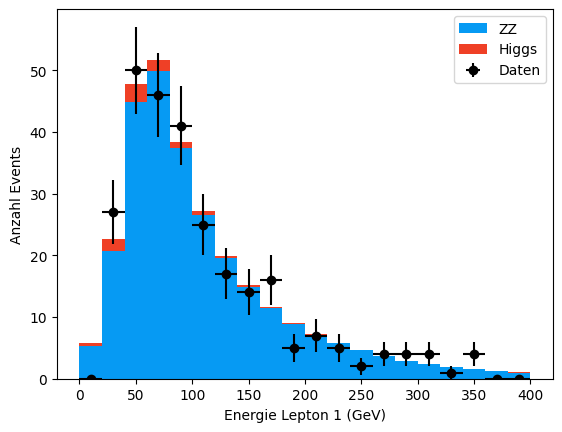

In [9]:
# Zuerst holen wir uns die Liste mit den Energien des ersten Leptons für
# Ereignisse in den gemessenen Daten
Gemessene_Daten = Observablen_Daten["E_Lepton1"]

# Dann machen wir dasselbe für alle simulierten Prozesse. Da es mehrere gibt,
# speichern wir die Listen mit den Energiewerten nacheinander in einer Liste
Simulierte_Daten = [ Observablen_ZZ["E_Lepton1"], Observablen_Higgs["E_Lepton1"] ]

# Für die simulierten Daten brauchen wir noch
labels  = [ "ZZ",       "Higgs"       ]
colors  = [ "#069AF3",  "#EF4026"     ]
weights = [ Observablen_ZZ["weight"], Observablen_Higgs["weight"]]

# Damit erstellen wir jetzt ein Histogramm der Energien des ersten Leptons
# Wir wählen 20 Bins (Intervalle) im Bereich zwischen 0 und 400 GeV
Nbins = 20
xmin = 0
xmax = 400
# Als Namen der Observablen für das x-Achsenlabel setzen wir:
name = "Energie Lepton 1 (GeV)"
# Damit rufen wir obige Funktion zum Erstellen des Histogramms auf
plot(Nbins, xmin, xmax, Gemessene_Daten, Simulierte_Daten, weights, labels, colors, name)

Analog können wir das für das Lepton-pT machen:

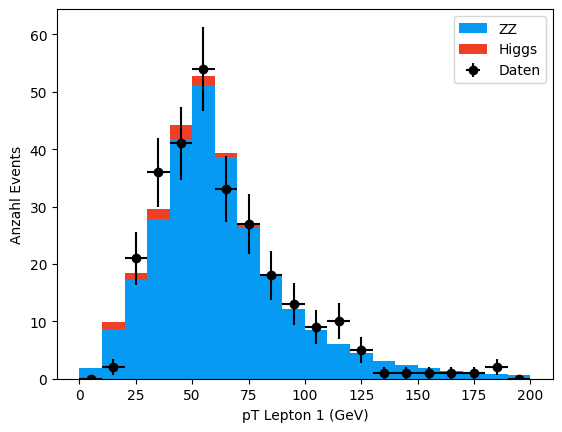

In [10]:
# Nun holen wir uns die Werte des Lepton-pT des ersten Leptons
Gemessene_Daten = Observablen_Daten["pT_Lepton1"]
Simulierte_Daten = [ Observablen_ZZ["pT_Lepton1"], Observablen_Higgs["pT_Lepton1"] ]

# Die labels usw. für die simulierten Daten müssen wir nicht neu definieren,
# sondern können sie einfach von oben wiederverwenden. Wir passen aber die
# x-Achse entsprechend der neuen Observable an
Nbins = 20
xmin = 0
xmax = 200
name = "pT Lepton 1 (GeV)"
plot(Nbins, xmin, xmax, Gemessene_Daten, Simulierte_Daten, weights, labels, colors, name)

Wir wollen uns nun die Energie- und pT-Verteilungen näher anschauen.
- Kann man Higgs-Ereignisse (rot) von ZZ-Untergrundereignissen (blau) unterscheiden?
- Was meint Ihr: enthalten die Daten (schwarze Punkte) Higgs-Ereignisse?
- Stimmen die Daten mit der Simulation überein?


## Fortgeschrittene Analyse 1: Energie und pT von Lepton 2

Ändern sich die Energie- und pT-Verteilungen für die weiteren Leptonen, z.B. für das jeweils zweite Lepton im Event?

Gehe wie folgt vor:
1. Ergänze die Datenanalysefunktion `ReconstructEvents` so, dass sie auch Energie und pT des zweiten Leptons bestimmt und zurückgibt.
2. Stelle Energie und pT des zweiten Leptons wieder als Histogramme dar.

**Hinweis**: nachdem Du `ReconstructEvents` angepasst hast, musst Du die Zellen im Abschnitt "Datenanalyse" erneut ausführen. Dadurch läuft die Analyse erneut über die Daten, damit nun auch die Werte des zweiten Leptons berechnet und gespeichert werden.

## Fortgeschrittene Analye 2: invariante Masse des Higgs-Teilchens

Nun nehmen wir an, dass die vier Leptonen aus dem Zerfall eines Higgs-Teilchens entstanden sind. Erstelle ein Histogramm der invarianten Masse des Ursprungsteilchens.

Dafür müssen wir zuerst das Ursprungsteilchen aus den gemessenen Leptonen rekonstruieren und dann seine invariante Masse bestimmen. Gehe dafür wie folgt vor:
1. erweitere ReconstructEvents, sodass das Higgs-Teilchen als Summe der Leptonen rekonstruiert wird.
2. bestimme die invariante Masse des so rekonstruierten Higgs-Teilchens. Dafür kannst Du die Funktion `Mass(p)` verwenden, die oben im Abschnitt "Berechnung der invarianten Masse" definiert ist. Die Funktion ist aber noch unvollständing, die Berechnung der Masse muss noch implementiert werden.
3. stelle die invariante Masse als Histogramm dar.

Kann man hier Higgs-Ereignisse von ZZ-Untergrundereignissen unterscheiden? Gibt es Higgs-Teilchen in den Daten?